In [1]:
import drjit as dr
import mitsuba as mi
import matplotlib.pyplot as plt
import os
os.environ["OPENCV_IO_ENABLE_OPENEXR"]="1"
import cv2

In [2]:
mi.set_variant('cuda_ad_rgb')
from mitsuba import ScalarTransform4f as T


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


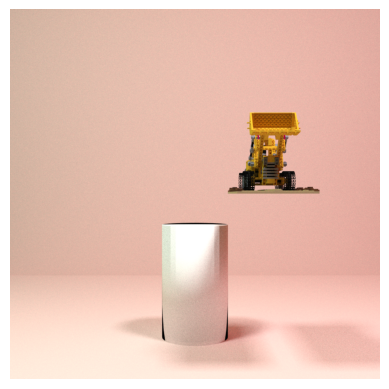

In [37]:
scene_both = mi.load_file("Scene_Data/cbox_lego_both.xml")
view_both = mi.render(scene_both, spp=128)
mi.Bitmap(view_both).write('lego_both.exr')
both = cv2.imread('lego_both.exr', cv2.IMREAD_ANYCOLOR | cv2.IMREAD_ANYDEPTH)

plt.axis("off")
plt.imshow(cv2.cvtColor(both** (1.0/2.2), cv2.COLOR_BGR2RGB))


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


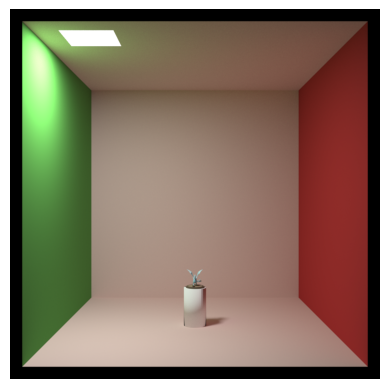

In [4]:
scene_left = mi.load_file("Scene_Data/cbox_left.xml")
view_left = mi.render(scene_left, spp=1024)
mi.Bitmap(view_left).write('left.exr')
left = cv2.imread('left.exr', cv2.IMREAD_ANYCOLOR | cv2.IMREAD_ANYDEPTH)

plt.axis("off")
plt.imshow(cv2.cvtColor(left** (1.0/2.2), cv2.COLOR_BGR2RGB))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


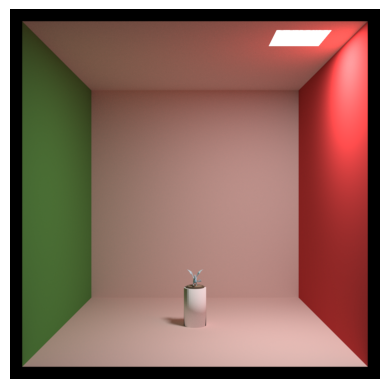

In [5]:
scene_right = mi.load_file("Scene_Data/cbox_right.xml")
view_right = mi.render(scene_right, spp=1024)
mi.Bitmap(view_right).write('right.exr')
right = cv2.imread('right.exr', cv2.IMREAD_ANYCOLOR | cv2.IMREAD_ANYDEPTH)

plt.axis("off")
plt.imshow(cv2.cvtColor(right** (1.0/2.2), cv2.COLOR_BGR2RGB))


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


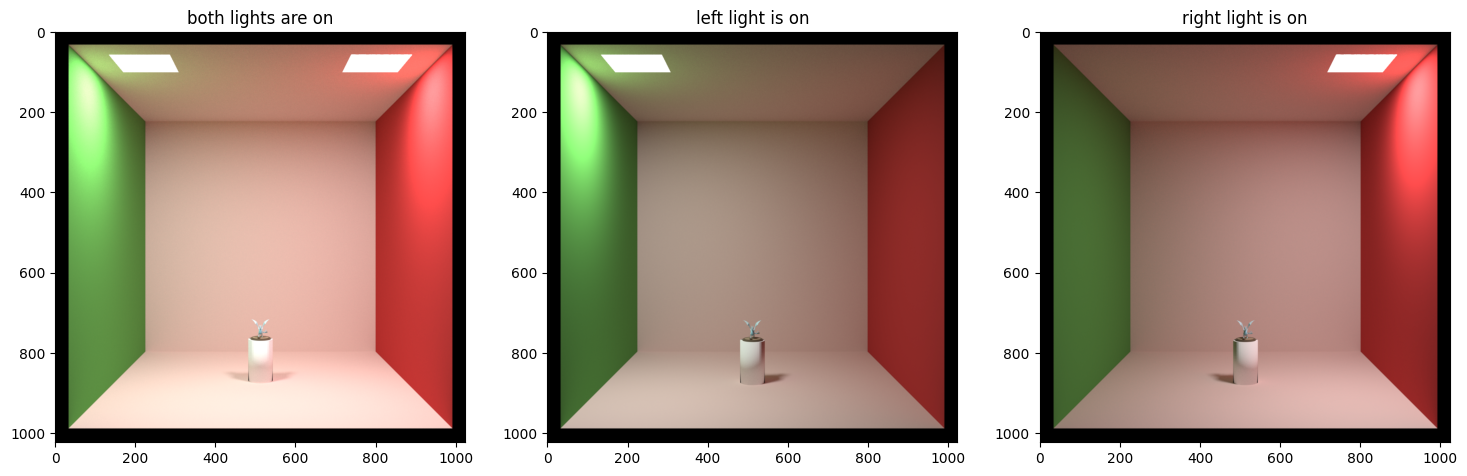

In [6]:
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

axs[0].imshow(cv2.cvtColor(both**(1.0/2.2), cv2.COLOR_BGR2RGB))
axs[0].set_title("both lights are on")

axs[1].imshow(cv2.cvtColor(left**(1.0/2.2), cv2.COLOR_BGR2RGB))
axs[1].set_title("left light is on")

axs[2].imshow(cv2.cvtColor(right**(1.0/2.2), cv2.COLOR_BGR2RGB))
axs[2].set_title("right light is on")

plt.show()


In [7]:
def load_sensor(r, theta, phi, pts):
    # Apply two rotations to convert from spherical coordinates to world 3D coordinates.
    origin = T.rotate([0, 0, 1], phi).rotate([0, 1, 0], theta) @ mi.ScalarPoint3f([0, 0, r])
    # target = pt+ T.rotate([0, 0, 1], phi).rotate([0, 1, 0], theta) @ mi.ScalarPoint3f([0, 0, 0])

    return mi.load_dict({
        'type': 'perspective',
        'fov': 50,
        'to_world': T.look_at(
            origin=origin,
            target=pts,
            up=[0, 1, 0]
        ),
        'sampler': {
            'type': 'independent',
            'sample_count': 16
        },
        'film': {
            'type': 'hdrfilm',
            'width': 1024,
            'height': 1024,
            'rfilter': {
                'type': 'tent',
            },
            'pixel_format': 'rgb',
        },
    })

In [19]:
for pt in pts:
    for theta in thetas:
        for phi in phis:
            print(T.rotate([0, 0, 1], phi).rotate([0, 1, 0], theta) @ mi.ScalarPoint3f([0, 0, radius]))


[4.763139724731445, 2.75, 9.52627944946289]
[2.749999761581421, 4.763139724731445, 9.52627944946289]
[-2.4041264623519965e-07, 5.5, 9.526278495788574]
[-2.750000238418579, 4.763139724731445, 9.526278495788574]
[-4.763139724731445, 2.750000238418579, 9.52627944946289]
[-5.5, -4.808252924703993e-07, 9.52627944946289]
[-4.763139724731445, -2.749999761581421, 9.52627944946289]
[-2.749999523162842, -4.763139724731445, 9.52627944946289]
[6.558677512202848e-08, -5.5, 9.52627944946289]
[2.749999523162842, -4.763139724731445, 9.52627944946289]
[4.763139247894287, -2.7500009536743164, 9.52627944946289]
[5.5, 9.616505849407986e-07, 9.52627944946289]
[8.25, 4.763139724731445, 5.499999523162842]
[4.763139724731445, 8.250000953674316, 5.499999523162842]
[-4.164069196122e-07, 9.52627944946289, 5.499999523162842]
[-4.763140678405762, 8.25, 5.499999523162842]
[-8.25, 4.763140678405762, 5.499999523162842]
[-9.52627944946289, -8.328138392244e-07, 5.499999523162842]
[-8.250000953674316, -4.763139724731445

In [20]:
radius = 5
phis = [30*(i+1) for i in range(12)]
thetas = [30*(j+1) for j in range(12)]
# thetas = [90]
pts = [[0,-10,0]]

sensors = []
for pt in pts:
    for theta in thetas:
        for phi in phis:
            sensors.append(load_sensor(radius,theta,phi, pt))
sensor_count = len(sensors)

In [9]:
# lookat_ys = [-10]
# ys=[-10, -5]
# xs=[-10, -5, -3, 0, 3, 5, 10]
# zs=[-10, -5, -3, 0, 3, 5, 10]
# sensors = []
# for lookat_y in lookat_ys:
#     for y in ys:
#         for z in zs:
#             for x in xs:
#                 sensors.append(load_sensor(x,y,z, lookat_y))
# sensor_count = len(sensors)

In [10]:
sensor_count

144

In [11]:
current_dir = os.getcwd()

In [12]:
current_dir

'/home/sa11799x/Documents/Thesis_Aryaman/Mitsuba_scene_creation'

both image


In [13]:
scene_both = mi.load_file("Scene_Data/cbox_both.xml")
images_both = [mi.render(scene_both, spp=128, sensor=sensor) for sensor in sensors]



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

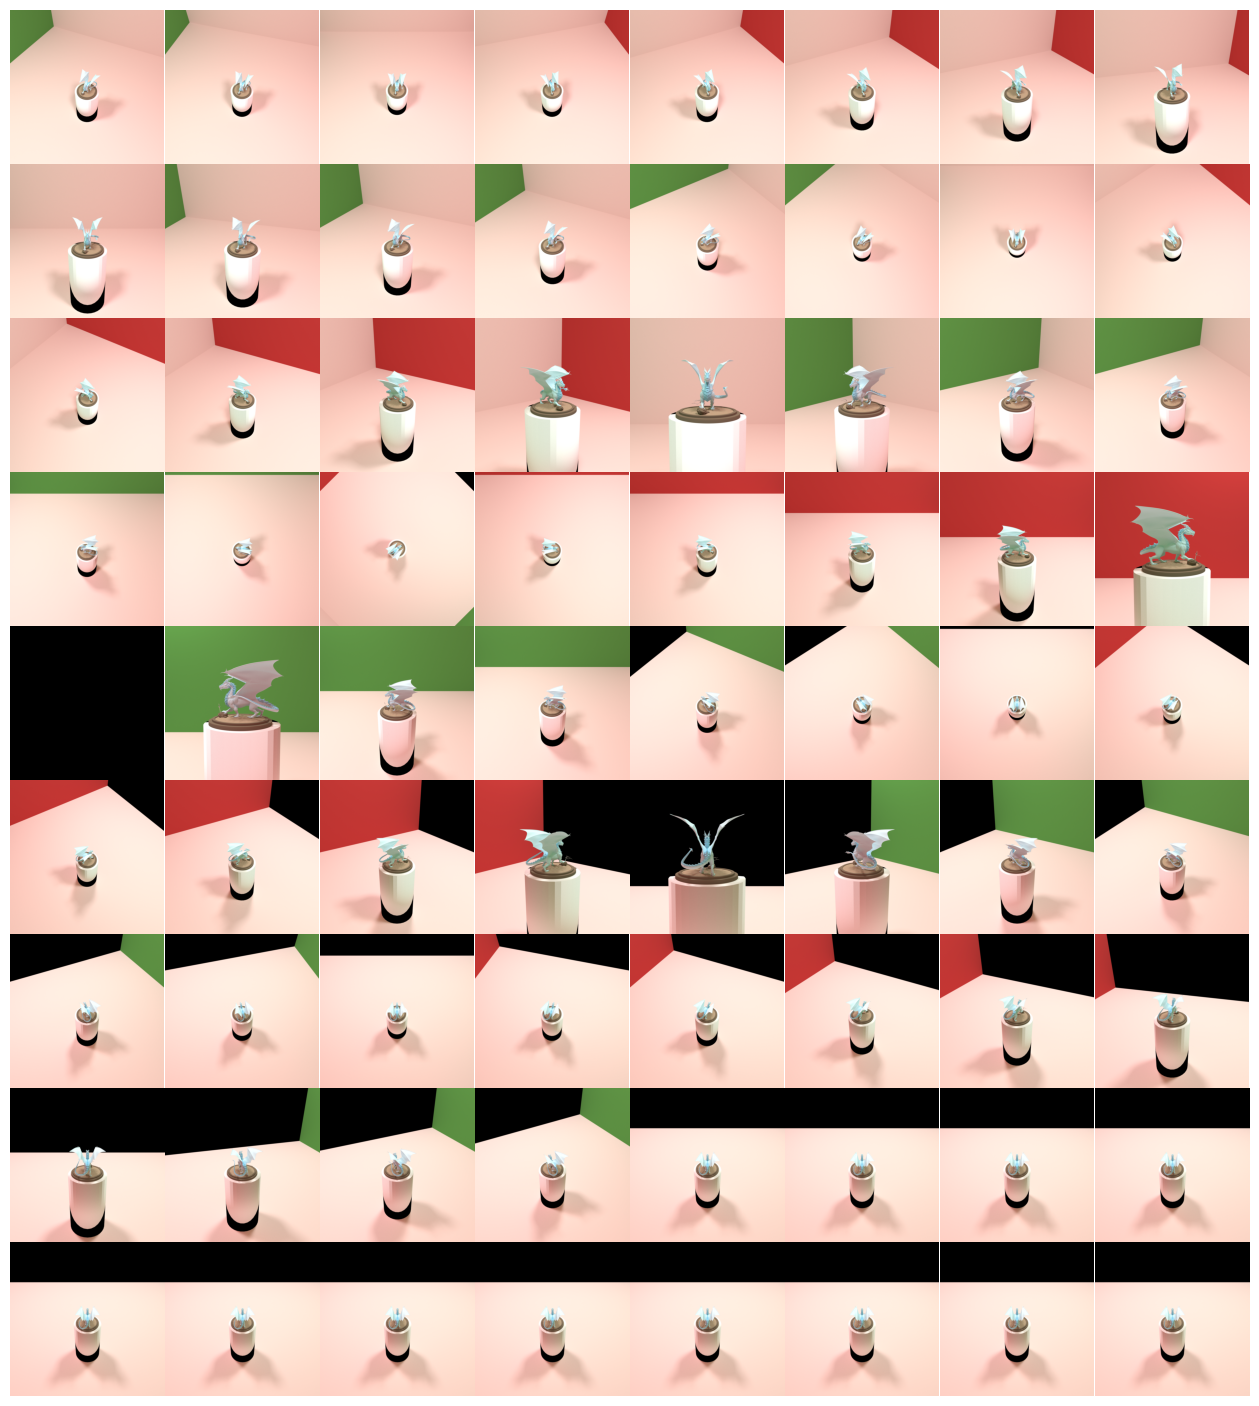

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

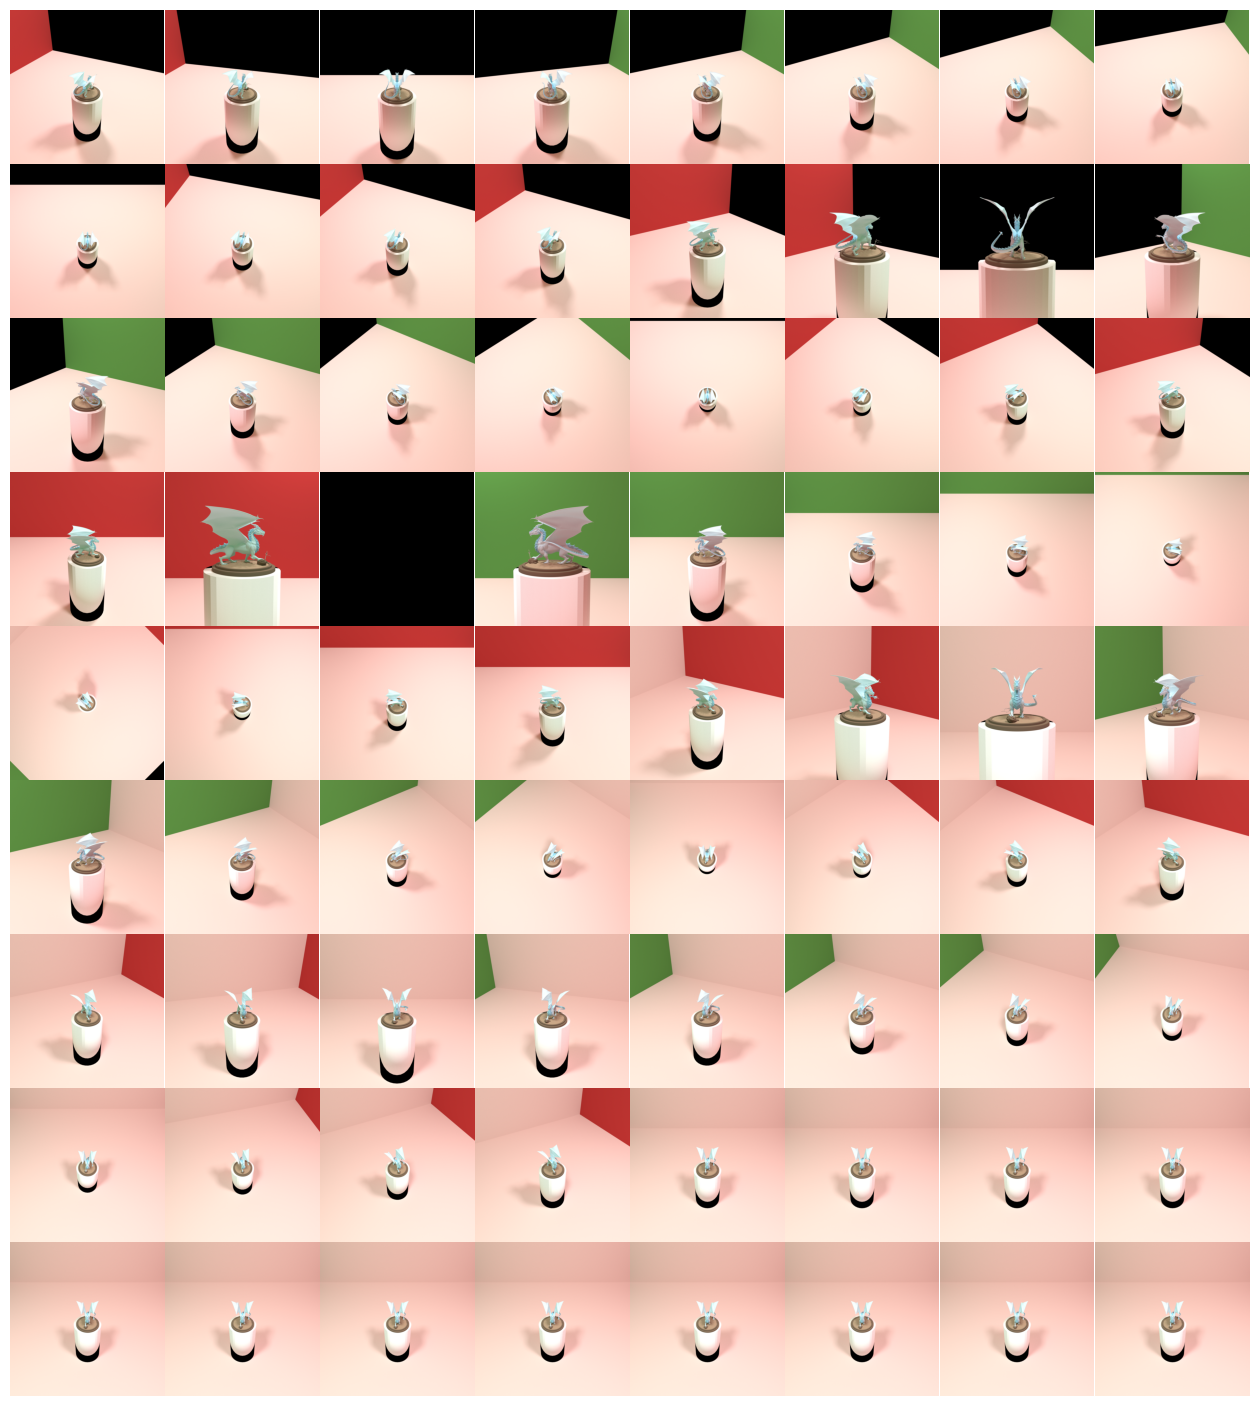

In [14]:
fig1 = plt.figure(figsize=(16,18))
fig1.subplots_adjust(wspace=0, hspace=0)
for i in range(int(sensor_count)//2):
    ax = fig1.add_subplot(9, 8, i + 1).imshow(images_both[i] ** (1.0 / 2.2))
    plt.axis("off")
plt.show()

fig2 = plt.figure(figsize=(16,18))
fig2.subplots_adjust(wspace=0, hspace=0)
for i in range(int(sensor_count)//2, int(sensor_count)):
    ax = fig2.add_subplot(9, 8, i + 1 - 72).imshow(images_both[i] ** (1.0 / 2.2))
    plt.axis("off")
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


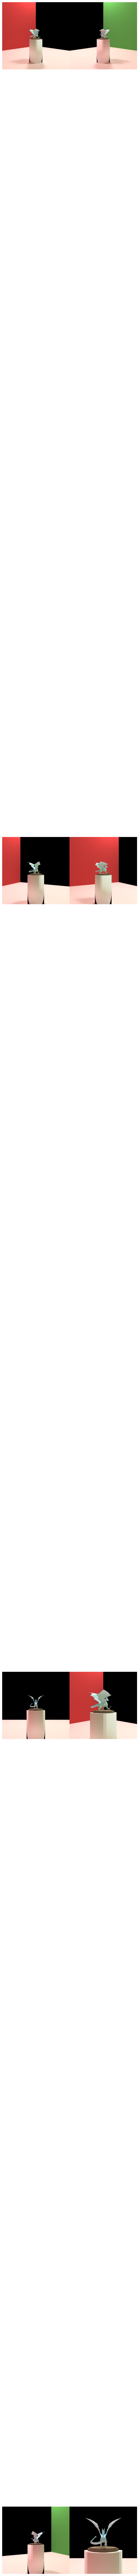

In [16]:
fig = plt.figure(figsize=(8,8* int(len(sensors) / 4)))
fig.subplots_adjust(wspace=0, hspace=0)
h = 1
for row in range(4):
    for col in range(2):
        index = col * 4 + row+1
        ax = fig.add_subplot(4,2, h)
        ax.imshow(images_both[index - 1] ** (1.0 / 2.2))
        plt.axis("off")
        h += 1

plt.show()

In [ ]:
folder_name = current_dir+"/Data/both/files_EXR"
if not os.path.exists(folder_name):
    os.makedirs(folder_name)
for i, sensor in enumerate(sensors):
    os.chdir(folder_name)
    phi_value = phis[i // len(thetas)]
    theta_value = thetas[i % len(thetas)]
    file_name_exr = f"{phi_value}_{theta_value}.exr"
    file_path_exr = os.path.join(folder_name, file_name_exr)
    mi.Bitmap(images_both[i]).write(file_name_exr)
    # mi.util.write_bitmap(file_path_exr, images_both[i])
    # print(i,file_name_exr, file_path_exr)
os.chdir(current_dir)    



In [15]:
folder_name = current_dir+"/Data/2203/both/files_PNG"
if not os.path.exists(folder_name):
    os.makedirs(folder_name)
for i, sensor in enumerate(sensors):
    os.chdir(folder_name)
    phi_value = phis[i // len(thetas)]
    theta_value = thetas[i % len(thetas)]
    file_name_png = f"{phi_value}_{theta_value}.png"
    file_path_png = os.path.join(folder_name, file_name_png)
    mi.util.write_bitmap(file_path_png, images_both[i])
    os.chdir(current_dir)
os.chdir(current_dir)    


In [21]:
folder_name = current_dir+"/Data/Manual_cart/both/files_PNG"
if not os.path.exists(folder_name):
    os.makedirs(folder_name)
for i, sensor in enumerate(sensors):
    os.chdir(folder_name)
    lookat_y = lookat_ys[i // (len(xs) * len(zs) * len(ys)]
    x = xs[(i // len(zs)) % len(xs)]
    y = ys[(i // len(zs)) % len(ys)]
    z = zs[i % len(zs)]
    file_name_png = f"{lookat_y}_{x}_{y}_{z}.png"
    file_path_png = os.path.join(folder_name, file_name_png)
    mi.util.write_bitmap(file_path_png, images_both[i])
    os.chdir(current_dir)
os.chdir(current_dir)    


right image:

In [22]:
images_right = [mi.render(scene_right, spp=1024, sensor=sensor) for sensor in sensors]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


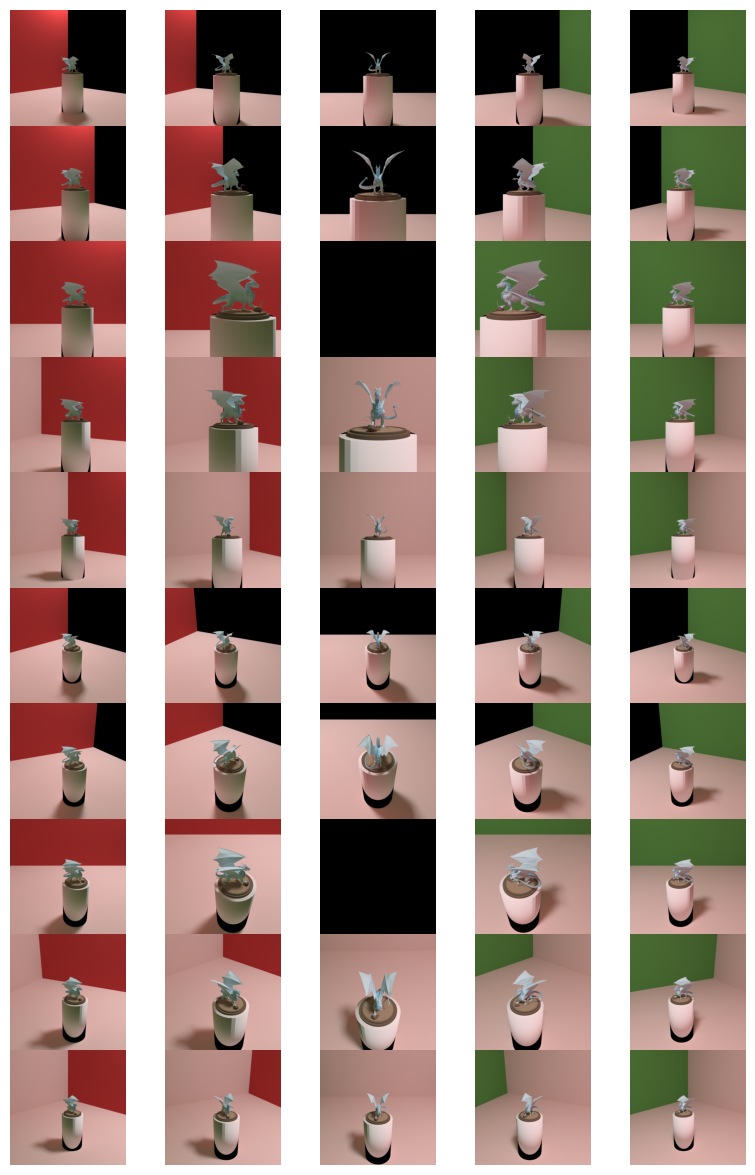

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

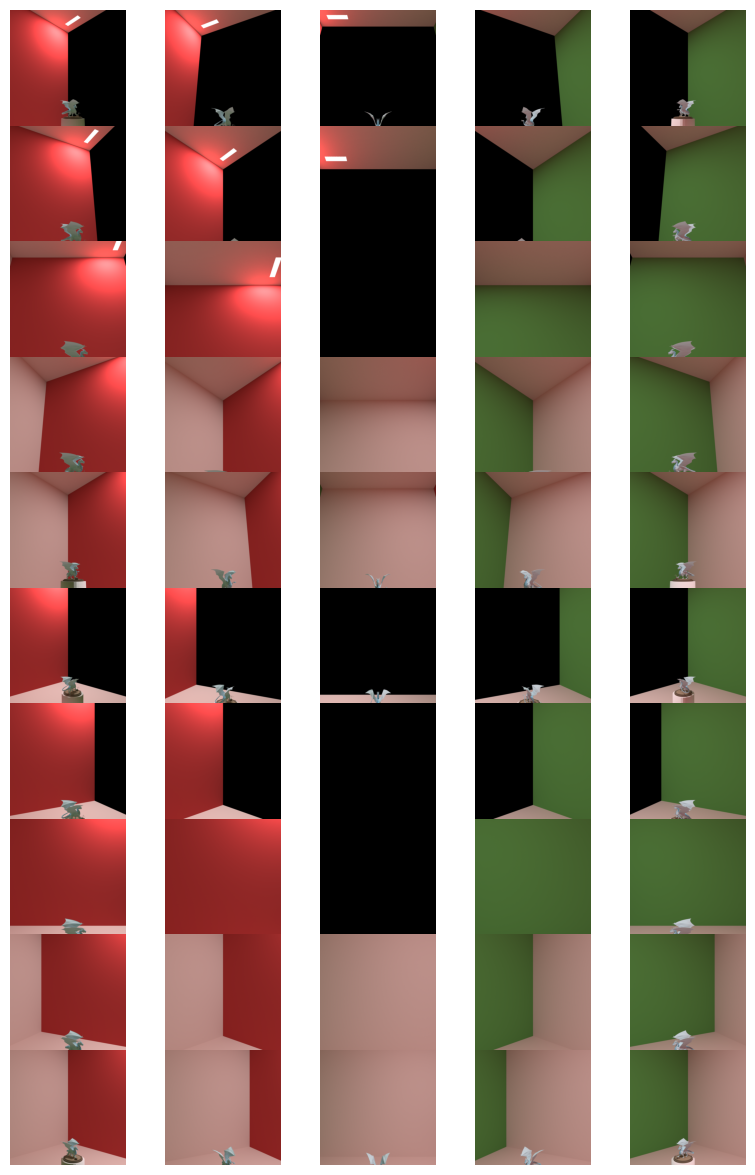

In [23]:
fig1 = plt.figure(figsize=(10,15))
fig1.subplots_adjust(wspace=0, hspace=0)
for i in range(50):
    ax = fig1.add_subplot(10, 5, i + 1).imshow(images_right[i] ** (1.0 / 2.2))
    plt.axis("off")
plt.show()

fig2 = plt.figure(figsize=(10,15))
fig2.subplots_adjust(wspace=0, hspace=0)
for i in range(50, 100):
    ax = fig2.add_subplot(10, 5, i + 1 - 50).imshow(images_right[i] ** (1.0 / 2.2))
    plt.axis("off")
plt.show()

In [ ]:
folder_name = current_dir+"/Data/right/files_EXR"
if not os.path.exists(folder_name):
    os.makedirs(folder_name)
for i, sensor in enumerate(sensors):
    os.chdir(folder_name)
    phi_value = phis[i // len(thetas)]
    theta_value = thetas[i % len(thetas)]
    file_name_exr = f"{phi_value}_{theta_value}.exr"
    file_path_exr = os.path.join(folder_name, file_name_exr)
    mi.Bitmap(images_right[i]).write(file_name_exr)
    # print(i,file_name_exr, file_path_exr)
os.chdir(current_dir)    


In [24]:
folder_name = current_dir+"/Data/Manual_cart/right/files_PNG"
if not os.path.exists(folder_name):
    os.makedirs(folder_name)
for i, sensor in enumerate(sensors):
    os.chdir(folder_name)
    lookat_y = lookat_ys[i // (len(xs) * len(zs) * len(ys))]
    x = xs[(i // len(zs)) % len(xs)]
    y = ys[(i // len(zs)) % len(ys)]
    z = zs[i % len(zs)]
    file_name_png = f"{lookat_y}_{x}_{y}_{z}.png"
    file_path_png = os.path.join(folder_name, file_name_png)
    mi.util.write_bitmap(file_path_png, images_right[i])
os.chdir(current_dir)    


In [25]:
images_left = [mi.render(scene_left, spp=1024, sensor=sensor) for sensor in sensors]


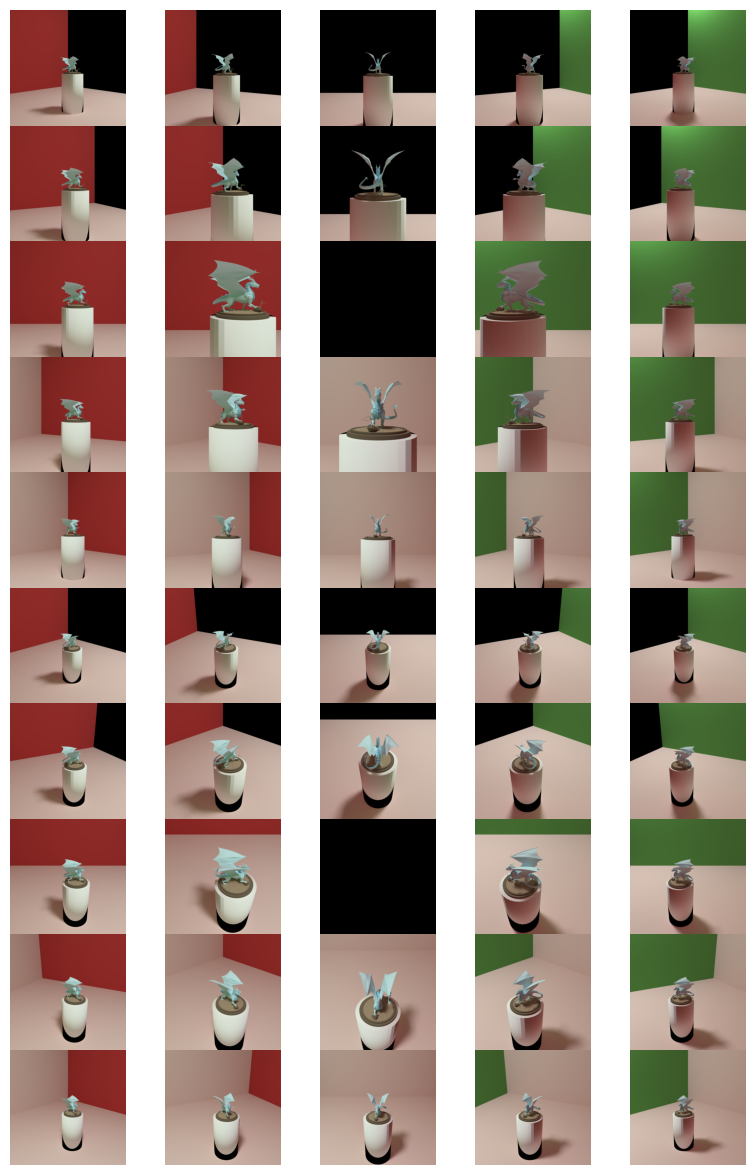

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

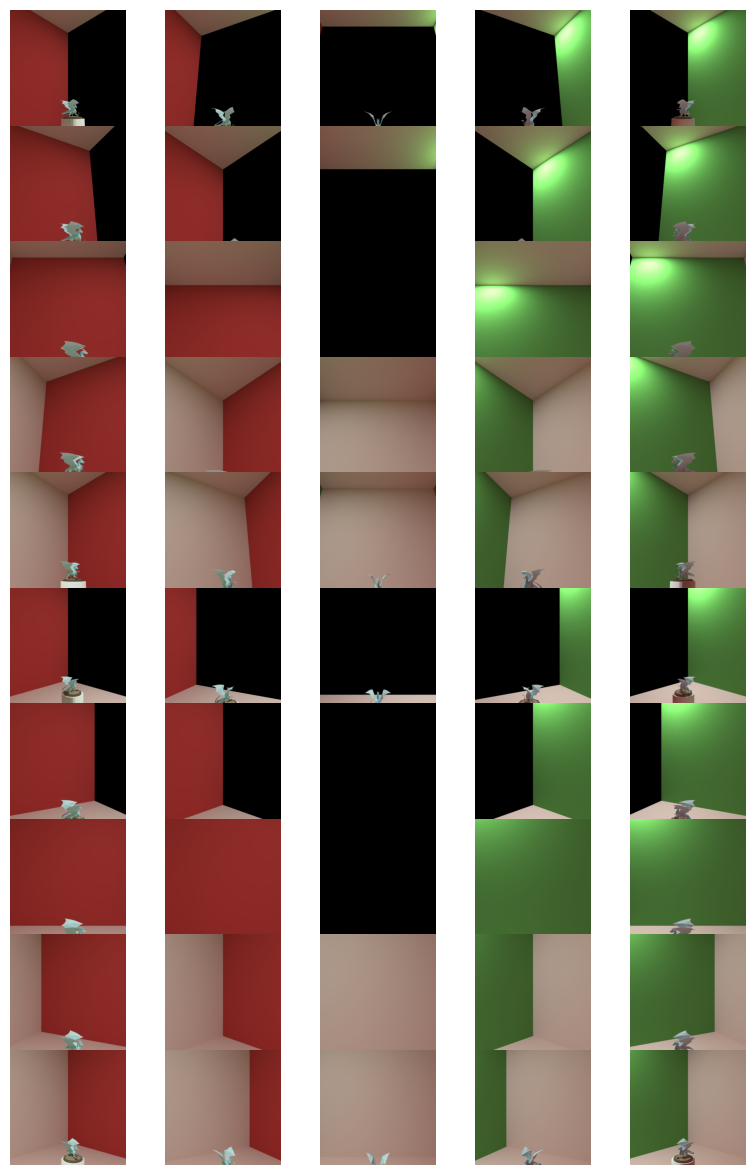

In [26]:
fig1 = plt.figure(figsize=(10,15))
fig1.subplots_adjust(wspace=0, hspace=0)
for i in range(50):
    ax = fig1.add_subplot(10, 5, i + 1).imshow(images_left[i] ** (1.0 / 2.2))
    plt.axis("off")
plt.show()

fig2 = plt.figure(figsize=(10,15))
fig2.subplots_adjust(wspace=0, hspace=0)
for i in range(50, 100):
    ax = fig2.add_subplot(10, 5, i + 1 - 50).imshow(images_left[i] ** (1.0 / 2.2))
    plt.axis("off")
plt.show()

In [ ]:
folder_name = current_dir+"/Data/Manual_cart/left/files_EXR"
if not os.path.exists(folder_name):
    os.makedirs(folder_name)
for i, sensor in enumerate(sensors):
    os.chdir(folder_name)
    phi_value = phis[i // len(thetas)]
    theta_value = thetas[i % len(thetas)]
    file_name_exr = f"{phi_value}_{theta_value}.exr"
    file_path_exr = os.path.join(folder_name, file_name_exr)
    mi.Bitmap(images_left[i]).write(file_name_exr)
    # print(i,file_name_exr, file_path_exr)
os.chdir(current_dir)    


In [27]:
folder_name = current_dir+"/Data/left/files_PNG"
if not os.path.exists(folder_name):
    os.makedirs(folder_name)
for i, sensor in enumerate(sensors):
    os.chdir(folder_name)
    lookat_y = lookat_ys[i // (len(xs) * len(zs) * len(ys))]
    x = xs[(i // len(zs)) % len(xs)]
    y = ys[(i // len(zs)) % len(ys)]
    z = zs[i % len(zs)]
    file_name_png = f"{lookat_y}_{x}_{y}_{z}.png"
    file_path_png = os.path.join(folder_name, file_name_png)
    mi.util.write_bitmap(file_path_png, images_left[i])
os.chdir(current_dir)    
